#### Group No- 4
Yash Bhayani (20ME63R11)  
Rahul Agrawal (20ME63R35)  
Dhruvil Changani (20ME63R09)

## Stiffness of Rubber Bushing

#### Problem Statement

A rubber bushing $(a<r<b)$ consisting of comparatively rigid thin steel cylinders at $(r=a)$ and $(r=b)$ is shown. A force per unit length $(F)$ is applied to the inner cylinder in the positive X-direction.
Our aim is to find the relation between $F$ and the displacement $\delta$ of the inner cylinder in X-direction, and hence the stiffness of the bushing under such loading.
We shall do this for two cases:  
1. Assuming the cylinders to be long (plane strain) &    
2. Assuming the cylinders to be short (plane stress).   

We shall also plot the graph of the dimensionless stiffness $\frac{F}{\mu\delta}$ as a function of the ratio $\frac{a}{b}$ in the range $\frac{F}{\mu\delta}<100$.

**Assumptions:** Rubber is incompressible with shear modulus $\mu$ and deformation of steel is negligible as compared to rubber.
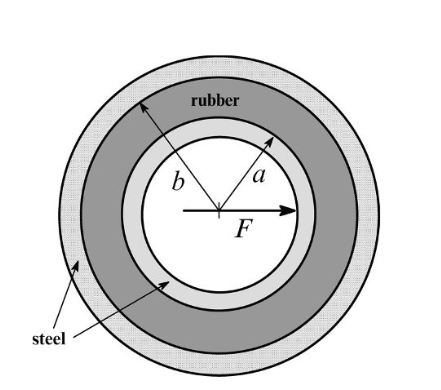

In [1]:
from polarUtilities import *
from IPython.display import Math, Latex

**Sign Conventions**- Assuming $r$ to be positive radially outwards and $\theta$ to be positive anti-clockwise.

From the problem statements, the displacement boundary conditions are:

\begin{align*}
BC1: u_{rr} &= \delta cos(\theta) \quad \text{at } r=a, \\
BC2: u_{\theta\theta} &= -\delta sin(\theta) \quad \text{at } r=a, \\
BC3: u_{rr} &= 0 \quad \text{at } r=b, \\
BC4: u_{\theta\theta} &= 0 \quad \text{at } r=b
\end{align*}

where $\delta$ is the displacement of inner cylinder in X-direction  
After transformation to polar($r-\theta$) co-ordinate system, the deformation along r-direction is given as $\delta cos\theta$ and along $\theta$ direction is given as $-\delta sin\theta$.

So from diplacement boundary condition we can say that as $u_{rr}$ should result in the form  $f(r)cos\theta$. But from strain displacement relation for polar co-ordinates we know that $\epsilon_{rr} = \frac{\partial u_{rr}}{\partial r}$ so we may conclude that $\epsilon_{rr}$ should be of the form $f^{'}(r)cos\theta$.  
Similarly, $u_{\theta\theta}$ should be of the form $g(r)sin\theta$. Again from strain-displacement relation for polar co-ordinates, $\epsilon_{\theta\theta} = \frac{1}{r}\frac{\partial u_{\theta\theta}}{\partial \theta} + \frac{u_{rr}}{r}$. From this equation it is evident that $\epsilon_{\theta\theta}$ should be of the form $\frac{g(r)cos\theta}{r} + \frac{f(r)cos\theta}{r}$ i.e. $h(r)cos\theta$.  
So based on above observation we  select the terms from general form of Michell Solution which contains terms of $sin\theta$ and $cos\theta$ and which would subsequently lead to terms of $sin\theta$ and $cos\theta$ in strains relation.

In [2]:
A11,A12,A13,A14,B11,B12,B13,B14=sym.symbols('A_11,A_12,A_13,A_14,B_11,B_12,B_13,B_14')

phi_interim = (A11*r**3 + A12*r*sym.log(r)+A14/r)*sym.cos(theta)+A13*r*theta*sym.sin(theta)+(B11*r**3 + B12*r*sym.log(r)+B14/r)*sym.sin(theta)+B13*r*theta*sym.cos(theta)

display(Math(r'\varphi_{{interim}} = {}'.format(sym.latex(phi_interim))))

<IPython.core.display.Math object>

The stresses from the stress function are derived from the Airy's Stress function approach in rectangular co-ordinates and then transforming the equations to Polar-coordinates. The complete code of the process is available in polarUtilities.py file.  
The final stress equations after the transformation are given as below-

In [3]:
phi_ex = sym.Function('phi')(r,theta)
sigmarr_ex = sigma_rr(phi_ex)
sigmatt_ex = sigma_tt(phi_ex)
sigmart_ex = sigma_rt(phi_ex)
display(Math(r'\sigma_{{rr}}= {}'.format(sym.latex(sigmarr_ex))))
display(Math(r'\sigma_{{\theta\theta}}= {}'.format(sym.latex(sigmatt_ex))))
display(Math(r'\sigma_{{r\theta}}= {}'.format(sym.latex(sigmart_ex))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
## Deriving stresses from Airy's Stress Function

sigmarr_interim = sigma_rr(phi_interim)
sigmatt_interim = sigma_tt(phi_interim)
sigmart_interim = sigma_rt(phi_interim)

display(Math(r'\sigma^{{interim}}_{{rr}} = {}'.format(sym.latex(sigmarr_interim))))
display(Math(r'\sigma^{{interim}}_{{\theta\theta}} = {}'.format(sym.latex(sigmatt_interim))))
display(Math(r'\sigma^{{interim}}_{{r\theta}} = {}'.format(sym.latex(sigmart_interim))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

For plane stress condition relation between stress and strains are as follows $(\sigma_{zz} = 0)$:

\begin{align*}
\epsilon_{rr} &= \frac{1}{E}(\sigma_{rr} - \nu\sigma_{\theta\theta}) \\
\epsilon_{\theta\theta} &= \frac{1}{E}(\sigma_{\theta\theta} - \nu\sigma_{rr})
\end{align*}

In [5]:
E,nu = sym.symbols('E,nu')

##Deriving strains for plane stress condition

epsrr_stress = ((1/E)*(sigmarr_interim - nu*sigmatt_interim)).expand().collect(sym.sin(theta)).collect(sym.cos(theta))
epstt_stress = ((1/E)*(sigmatt_interim - nu*sigmarr_interim)).expand().collect(sym.sin(theta)).collect(sym.cos(theta))

display(Math(r'\epsilon_{{rr}}^{{plane-stress}} = {}'.format(sym.latex(epsrr_stress))))
display(Math(r'\epsilon_{{\theta\theta}}^{{plane-stress}} = {}'.format(sym.latex(epstt_stress))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
##The coefficient of sin(theta) is made equal to zero in both epsilon_rr and epsilon_tt for plane stress.

lhs1 = epsrr_stress.coeff(sym.sin(theta))
cond1 = sym.Eq(lhs1,0)
display(cond1)

lhs2 = epstt_stress.coeff(sym.sin(theta))
cond2 = sym.Eq(lhs2,0)
display(cond2)

Eq(-6*B_11*nu*r/E + 2*B_11*r/E - B_12*nu/(E*r) + B_12/(E*r) - 2*B_13/(E*r) - 2*B_14*nu/(E*r**3) - 2*B_14/(E*r**3), 0)

Eq(-2*B_11*nu*r/E + 6*B_11*r/E - B_12*nu/(E*r) + B_12/(E*r) + 2*B_13*nu/(E*r) + 2*B_14*nu/(E*r**3) + 2*B_14/(E*r**3), 0)

For Plane Strain, we know  
  
$\epsilon_{rr} = \frac{1}{E}(\sigma_{rr} - \nu(\sigma_{\theta\theta} + \sigma_{zz}))$  
  
$\epsilon_{\theta\theta} = \frac{1}{E}(\sigma_{\theta\theta} - \nu(\sigma_{rr} + \sigma_{zz}))$  
  
$\epsilon_{zz} = \frac{1}{E}(\sigma_{zz} - \nu(\sigma_{rr} + \sigma_{\theta\theta})) = 0$  
  
Hence, substituting $\sigma_{zz} = \nu(\sigma_{rr} + \sigma_{\theta\theta})$ in equations of $\epsilon_{rr}$ and $\epsilon_{\theta\theta}$  
  
  The final stress-strain relations for plane strain are- 

\begin{align*}
\epsilon_{rr} &= \frac{1-\nu^{2}}{E}(\sigma_{rr} - \frac{\nu}{1-\nu}\sigma_{\theta\theta}) \\
\epsilon_{\theta\theta} &= \frac{1-\nu^{2}}{E}(\sigma_{\theta\theta} - \frac{\nu}{1-\nu}\sigma_{rr})
\end{align*}

In [7]:
## Deriving strains for plane strain condition

epsrr_strain = (((1-nu**2)/E)*(sigmarr_interim - (nu/(1-nu))*sigmatt_interim)).expand().collect(sym.cos(theta)).collect(sym.sin(theta))
epstt_strain = (((1-nu**2)/E)*(sigmatt_interim - (nu/(1-nu))*sigmarr_interim)).expand().collect(sym.cos(theta)).collect(sym.sin(theta))

display(Math(r'\epsilon_{{rr}}^{{plane-strain}} = {}'.format(sym.latex(epsrr_strain))))
display(Math(r'\epsilon_{{\theta\theta}}^{{plane-strain}} = {}'.format(sym.latex(epstt_strain))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
##The coefficient of sin(theta) is made equal to zero in both epsilon_rr and epsilon_tt for plane strain.

lhs3 = epsrr_strain.coeff(sym.sin(theta))
cond3 = sym.Eq(lhs3,0)
display(cond3)

lhs4 = epstt_strain.coeff(sym.sin(theta))
cond4 = sym.Eq(lhs4,0)
display(cond4)

Eq(6*B_11*nu**3*r/(-E*nu + E) - 6*B_11*nu*r/(-E*nu + E) - 2*B_11*nu**2*r/E + 2*B_11*r/E + B_12*nu**3/(-E*nu*r + E*r) - B_12*nu/(-E*nu*r + E*r) - B_12*nu**2/(E*r) + B_12/(E*r) + 2*B_13*nu**2/(E*r) - 2*B_13/(E*r) + 2*B_14*nu**3/(-E*nu*r**3 + E*r**3) - 2*B_14*nu/(-E*nu*r**3 + E*r**3) + 2*B_14*nu**2/(E*r**3) - 2*B_14/(E*r**3), 0)

Eq(2*B_11*nu**3*r/(-E*nu + E) - 2*B_11*nu*r/(-E*nu + E) - 6*B_11*nu**2*r/E + 6*B_11*r/E + B_12*nu**3/(-E*nu*r + E*r) - B_12*nu/(-E*nu*r + E*r) - B_12*nu**2/(E*r) + B_12/(E*r) - 2*B_13*nu**3/(-E*nu*r + E*r) + 2*B_13*nu/(-E*nu*r + E*r) - 2*B_14*nu**3/(-E*nu*r**3 + E*r**3) + 2*B_14*nu/(-E*nu*r**3 + E*r**3) - 2*B_14*nu**2/(E*r**3) + 2*B_14/(E*r**3), 0)

In [9]:
## Solving for the constants B11, B12, B13, B14

sym.linsolve([cond1,cond2,cond3,cond4],[B11,B12,B13,B14])

FiniteSet((-(B_13*r**2/2 + B_14)/r**4, 3*B_13 + 4*B_14/r**2, B_13, B_14))

So from above solution we get B11 and B12 as funtion of 'r' which is not possible as B11 and B12 are constants. Only one set of solutions that satisfies above conditions is  
[B11,B12,B13,B14] = [0,0,0,0]

So from above discussion we have following stress function that satisfies all the boundary condtions which is as follows

In [10]:
phi=A11*r**3*sym.cos(theta) + A12*r*sym.log(r)*sym.cos(theta)+A14/r*sym.cos(theta)+A13*r*theta*sym.sin(theta)
display(Math(r'\varphi = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

In [11]:
polarbiharm(phi)

0

So the phi identically satisfies Biharmonic condition, i.e. $\nabla^4 \varphi = 0$

### Writing Displacement fields for the chosen Airy Stress Function:

Now, from displacement component of The Michell solution as mentioned in Elasticity by J.R. Barber, the values of $u_{rr}$ and $u_{\theta\theta}$ corresponding to the chosen $\varphi$ are given as-  
\begin{align*}
2\mu u_{rr} = A_{11}(\kappa - 2)r^2 cos\theta + A_{12}\frac{1}{2}[(\kappa+1)\theta sin\theta - cos\theta + (\kappa - 1)log(r) cos\theta] + A_{13}\frac{1}{2}[(\kappa - 1)\theta sin\theta - cos\theta + (\kappa + 1)log(r)cos\theta] + A_{14}\frac{cos\theta}{r^2} + 2\mu X cos\theta
\end{align*}

\begin{align*}
2\mu u_{\theta\theta} = A_{11}(\kappa + 2)r^2 sin\theta + A_{12}\frac{1}{2}[(\kappa+1)\theta cos\theta - sin\theta - (\kappa - 1)log(r) sin\theta] + A_{13}\frac{1}{2}[(\kappa - 1)\theta cos\theta - sin\theta - (\kappa + 1)log(r)sin\theta] + A_{14}\frac{sin\theta}{r^2} - 2\mu X sin\theta
\end{align*}
  
  Here, X is an unknown constant which represents rigid body translation in X-direction.  
  $\mu$ is shear modulus of rubber.  
  $\kappa$ is Kolosov's constant.

As the displacement field of the Michell Solution contains the term $\kappa$, we write the stress-strain relations in terms of $\kappa$ (Kolosov's Constant)

\begin{align*}
\epsilon_{rr} &= \frac{\kappa + 1}{8\mu}\sigma_{rr} - \frac{3-\kappa}{8\mu}\sigma_{\theta\theta} \\ \\
\epsilon_{\theta\theta} &= \frac{\kappa + 1}{8\mu}\sigma_{\theta\theta} - \frac{3-\kappa}{8\mu}\sigma_{rr}\\ \\
\end{align*}

The plane strain and plane stress conditions are given as-
\begin{align*}
\\ \kappa &= 3-4\nu \quad \text{for plane strain }\\ \\
\kappa &= \frac{3-\nu}{1+\nu} \quad \text{for plane stress }
\end{align*}

In [12]:
mu, kappa, X, delta = sym.symbols('mu, kappa, X, delta')

## Defining displacements in r and theta direction.

urr = (A11*(kappa-2)*r**2*sym.cos(theta) + (A12/2)*((kappa+1)*theta*sym.sin(theta) - sym.cos(theta) + (kappa-1)*sym.log(r)*sym.cos(theta)) + (A13/2)*((kappa-1)*theta*sym.sin(theta) - sym.cos(theta) + (kappa + 1)*sym.log(r)*sym.cos(theta)) + A14*sym.cos(theta)/r**2 + 2*mu*X*sym.cos(theta))/(2*mu)
utt = (A11*(kappa+2)*r**2*sym.sin(theta) + (A12/2)*((kappa+1)*theta*sym.cos(theta) - sym.sin(theta) + (kappa-1)*sym.log(r)*sym.sin(theta)) + (A13/2)*((kappa-1)*theta*sym.cos(theta) - sym.sin(theta) + (kappa + 1)*sym.log(r)*sym.sin(theta)) + A14*sym.sin(theta)/r**2 - 2*mu*X*sym.sin(theta))/(2*mu)

display(Math(r'2\mu u_{{rr}}={}'.format(sym.latex(2*mu*urr))))
display(Math(r'2\mu u_{{\theta\theta}}={}'.format(sym.latex(2*mu*utt))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Since the terms '$\theta sin\theta$' and '$\theta cos\theta$' gives multi-valued displacement fields but as the geometry of our part under consideration is annular and it is assumed to have no voids, it should not have any multi-valued displacement field. Hence the coefficients of '$\theta sin\theta$' and '$\theta cos\theta$' should be equal to zero, i.e.

\begin{align*}
A_{12}(\kappa +1) + A_{13}(\kappa - 1) = 0
\end{align*}

In [13]:
## Applying Condtion to eliminate multi-valued terms from the displacement fields

lhs_eq1 = A12*(kappa+1) + A13*(kappa-1)
eq1 = sym.Eq(lhs_eq1,0)
display(Math(r'eq1: {}'.format(sym.latex(eq1))))

<IPython.core.display.Math object>

Applying the aforementioned boundary conditions:

In [14]:
a, b = sym.symbols('a,b', positive = True)

## Applying BC1

lhs_eq2 = 2*mu*urr.subs(r,a)
rhs_eq2 = 2*mu*delta*sym.cos(theta)
eq2 = sym.Eq(lhs_eq2, rhs_eq2)
display(Math(r'eq2: {}'.format(sym.latex(eq2))))

## Applying BC2

lhs_eq3 = 2*mu*utt.subs(r,a)
rhs_eq3 = -2*mu*delta*sym.sin(theta)
eq3 = sym.Eq(lhs_eq3, rhs_eq3)
display(Math(r'eq3: {}'.format(sym.latex(eq3))))

## Applying BC3

lhs_eq4 = 2*mu*urr.subs(r,b)
rhs_eq4 = 0
eq4 = sym.Eq(lhs_eq4, rhs_eq4)
display(Math(r'eq4: {}'.format(sym.latex(eq4))))

## Applying BC4

lhs_eq5 = 2*mu*urr.subs(r,b)
rhs_eq5 = 0
eq5 = sym.Eq(lhs_eq5, rhs_eq5)
display(Math(r'eq5: {}'.format(sym.latex(eq5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Solving for Constants:

We tried solving these 5 equations for the constants but we were unable to solve it using sympy. Hence, we moved onto MATLAB to solve the linear equations. As we got the final equation in MATLAB, it was easier for us to plot the graph in MATLAB itself-  
  
Code implemented-  
  
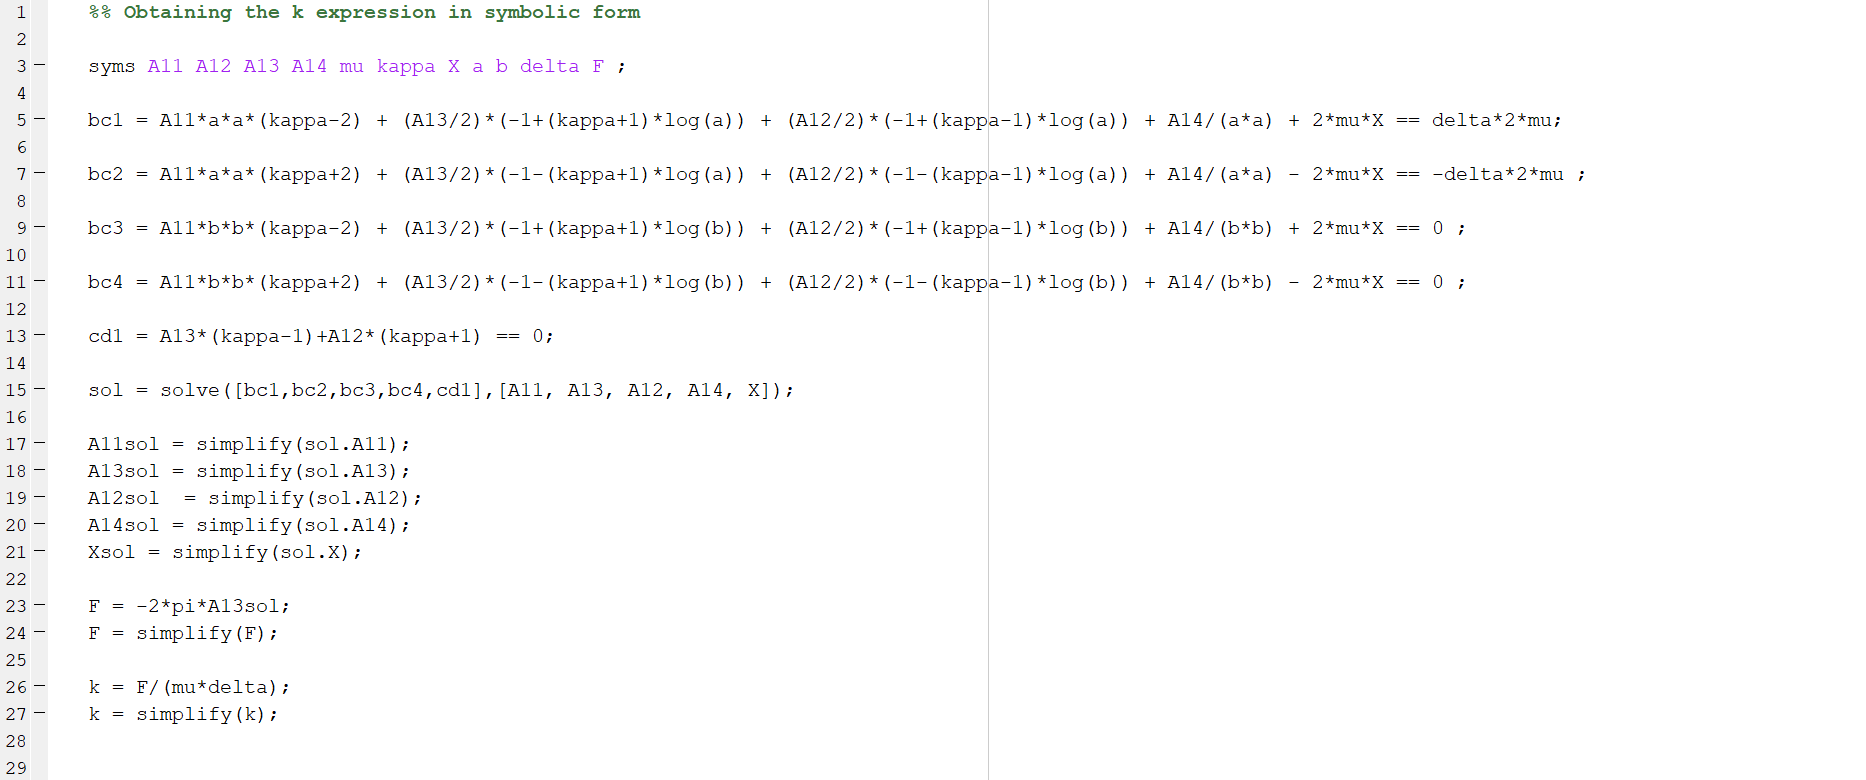  

In [15]:
## Writing Values of A11, A12, A13, A14

A11_soln = -(delta*mu)/(a**2 - b**2 - a**2*kappa**2*sym.log(a) + a**2*kappa**2*sym.log(b) - b**2*kappa**2*sym.log(a) + b**2*kappa**2*sym.log(b))

A12_soln = (delta*kappa*mu*(kappa - 1)*(a**2 + b**2))/(a**2 - b**2 - a**2*kappa**2*sym.log(a) + a**2*kappa**2*sym.log(b) - b**2*kappa**2*sym.log(a) + b**2*kappa**2*sym.log(b))

A13_soln = -(delta*kappa*mu*(kappa + 1)*(a**2 + b**2))/(a**2 - b**2 - a**2*kappa**2*sym.log(a) + a**2*kappa**2*sym.log(b) - b**2*kappa**2*sym.log(a) + b**2*kappa**2*sym.log(b))

A14_soln = -(a**2*b**2*delta*kappa*mu)/(a**2 - b**2 - a**2*kappa**2*sym.log(a) + a**2*kappa**2*sym.log(b) - b**2*kappa**2*sym.log(a) + b**2*kappa**2*sym.log(b))

display(Math(r'A_{{11}} = {}'.format(sym.latex(A11_soln))))
display(Math(r'A_{{12}} = {}'.format(sym.latex(A12_soln))))
display(Math(r'A_{{13}} = {}'.format(sym.latex(A13_soln))))
display(Math(r'A_{{14}} = {}'.format(sym.latex(A14_soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

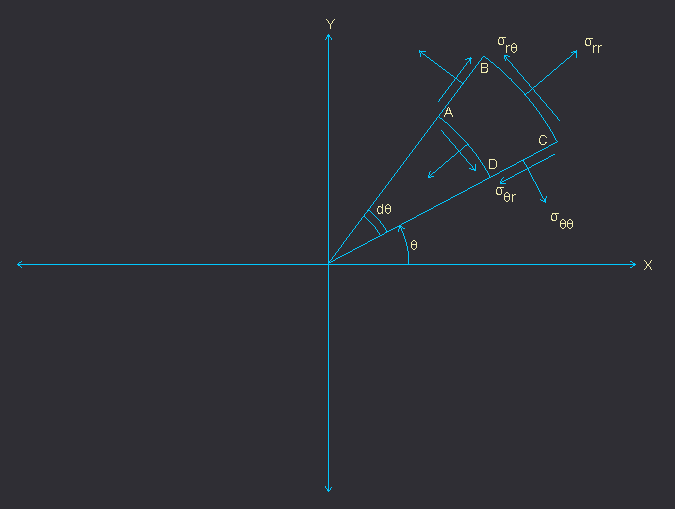
  
  The horizontal force acting the small element is given by - 
\begin{align*}
dF = (-\sigma_{rr}cos\theta + \sigma_{r\theta}sin\theta)rd\theta
\end{align*}  
  
Net horizontal force acting on the bushing should be-
\begin{align*}
F = \int_0^{2\pi}(-\sigma_{rr}cos\theta + \sigma_{r\theta}sin\theta)rd\theta
\end{align*}

In [16]:
## Deriving stresses from Airy's Stress Function

sigmarr = sigma_rr(phi)
sigmatt = sigma_tt(phi)
sigmart = sigma_rt(phi)

display(Math(r'\sigma_{{rr}} = {}'.format(sym.latex(sigmarr))))
display(Math(r'\sigma_{{\theta\theta}} = {}'.format(sym.latex(sigmatt))))
display(Math(r'\sigma_{{r\theta}} = {}'.format(sym.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
##Applying the above mentioned integration condition.

F = sym.symbols('F', positive = True)
lhs_cond1_ = (sym.integrate(r*(-sigmarr*sym.cos(theta)+sigmart*sym.sin(theta)),(theta,0,2*sym.pi))).expand()
cond1_ = sym.Eq(lhs_cond1_,F)
display(Math(r'ForceCondition: {}'.format(sym.latex(cond1_))))

<IPython.core.display.Math object>

In [18]:
lhs_force_eq = lhs_cond1_.subs(A13, A13_soln)
force_eq = sym.Eq(lhs_force_eq, F)
display(Math(r'ForceEquation: {}'.format(sym.latex(force_eq))))

<IPython.core.display.Math object>

Since, we have to plot a graph between dimensionless stiffness, $k = \frac{F}{\mu \delta}$ , therefore, dividing the lhs and rhs of the force equation by $\mu \delta$

In [19]:
stiffness_eq = sym.Eq(F/(mu*delta), force_eq.lhs/(mu*delta))
display(Math(r'k = {}'.format(sym.latex(stiffness_eq))))

<IPython.core.display.Math object>

### Plotting the Graph

Rewriting the equation such the $\frac{a}{b}$ is observed in numerator and denominator.

\begin{align*}
k = \frac{2\pi \kappa (\kappa + 1)(\frac{a^2}{b^2} + 1)}{-\kappa^2 (\frac{a^2}{b^2} + 1) log\frac{a}{b} + \frac{a^2}{b^2} -1}
\end{align*}  
    
  As mentioned before, the relation of $\kappa$ for plane strain and plane stress conditions are-
\begin{align*}
\\ \kappa &= 3-4\nu \quad \text{for plane strain }\\ \\
\kappa &= \frac{3-\nu}{1+\nu} \quad \text{for plane stress }
\end{align*}
  
As rubber is assumed to be of incompressible material, therefore, $\nu = \frac{1}{2}$  
\begin{align*}
\\ \kappa &= 1 \quad \text{for plane strain }\\ \\
\kappa &= \frac{5}{3} \quad \text{for plane stress }
\end{align*}  
  
  Substituting these values of $\kappa$ in the equation of $k$ and then plotting the relation in MATLAB-  
  Code
  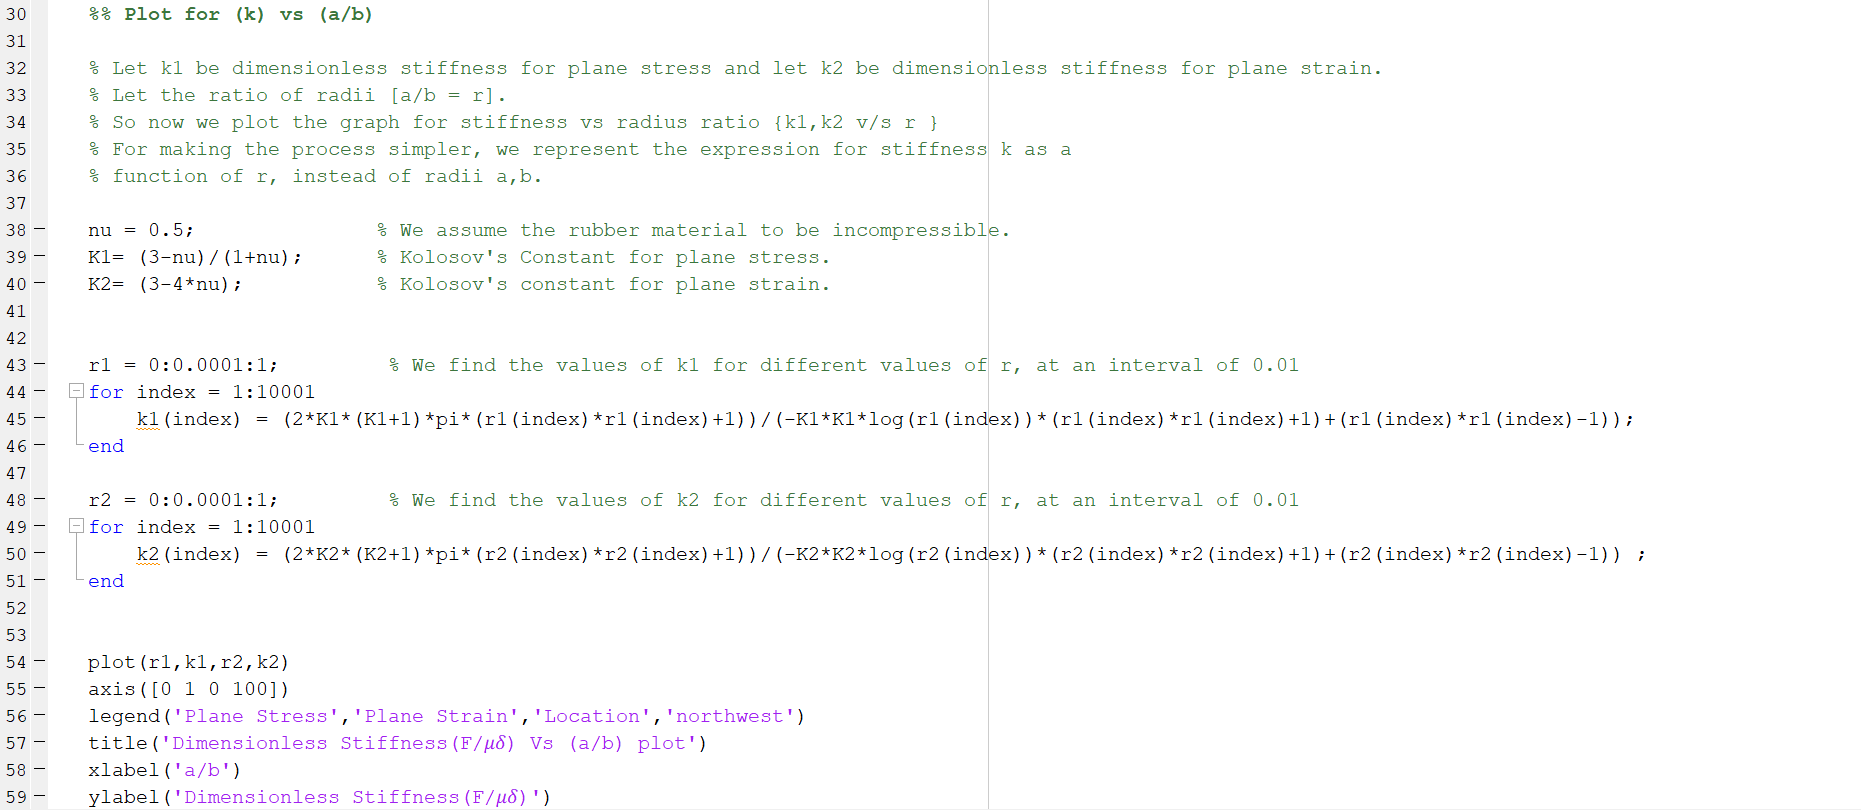  
  
  
    
  The result of the plot for Plane Stress and Plane Strain are-  
  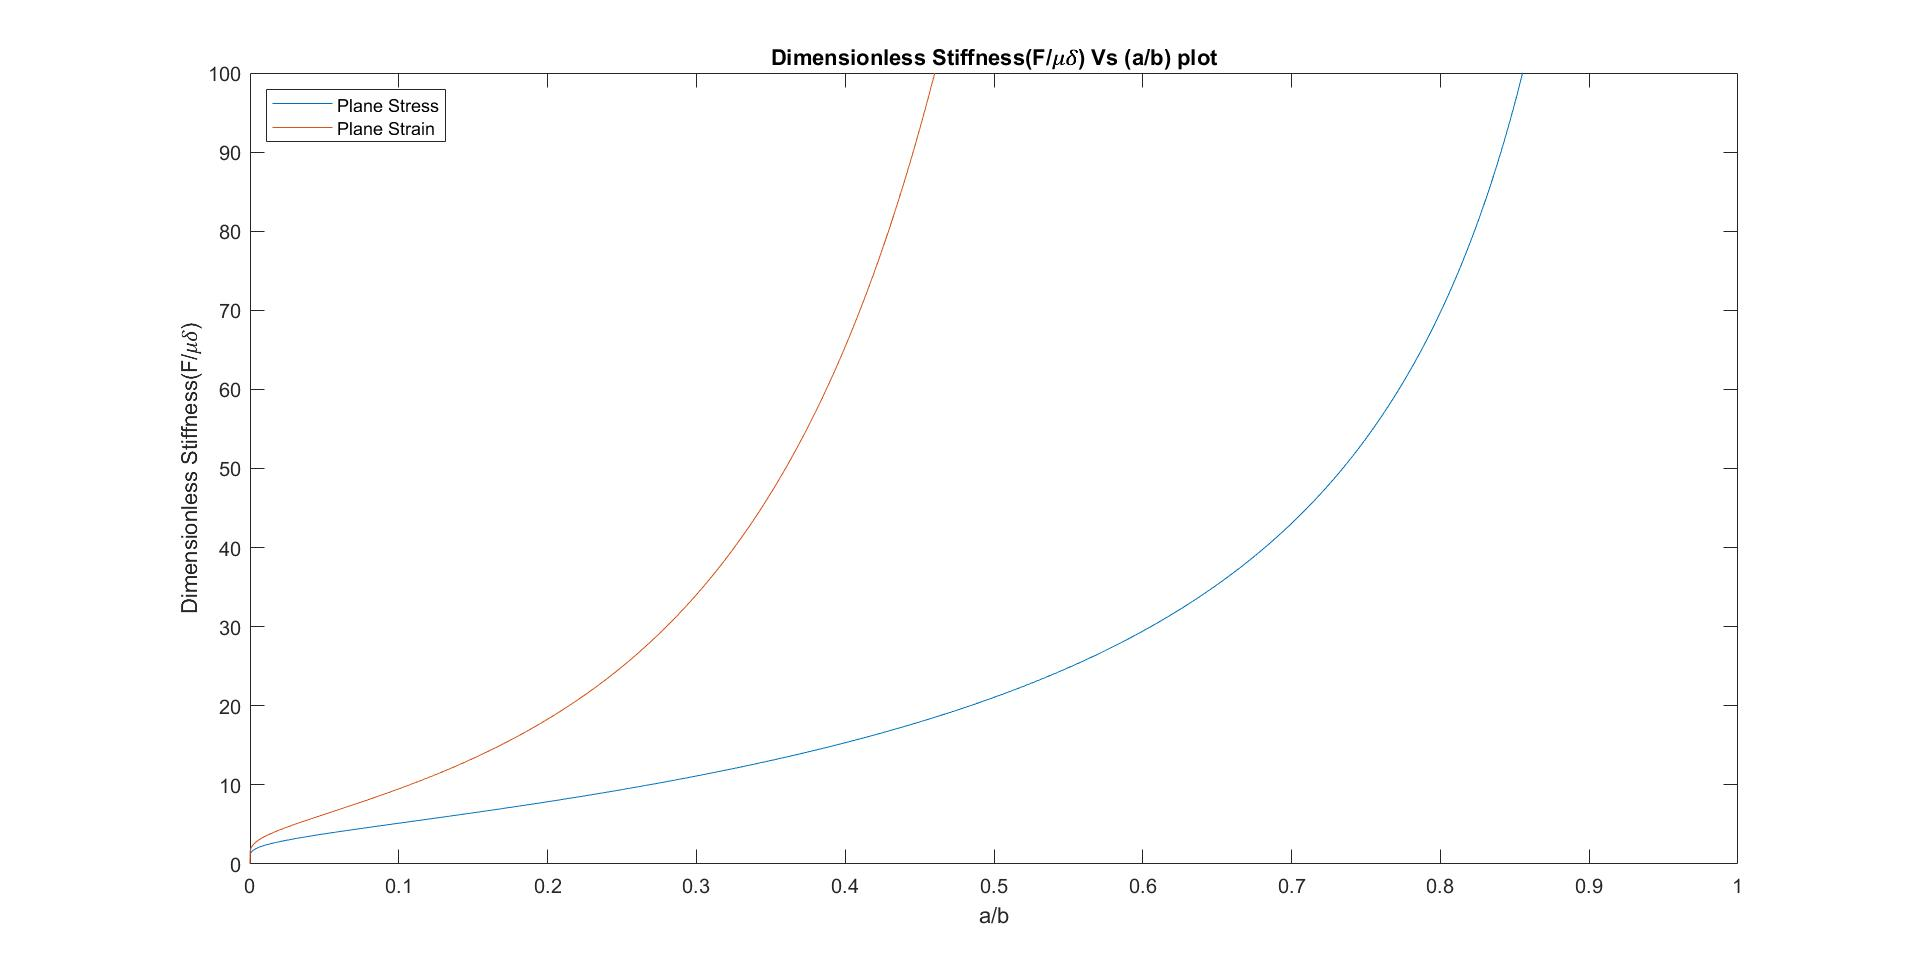

### Conclusion:

1. The plot shows that the stiffness is more for plane strain condition as compared to that for plane stress condition for any given ratio of the radii. When the inner ring moves in the direction of force F, some material has to be removed from the right half part and some material has to be added to the left half part as the material is considered to be incompressible. For the short bushing (plane stress condition) we observe that material is added/removed from the nearby region in axial directions and it gets bulged in right part and it is pulled in left part. For long bushings (Plane Strain), the ends are theoretically fixed and the rubber cannot be bulged axially, hence the flow of material is difficult and hence provides higher stiffness. So, the stiffness obtained in the short bushings is lower and that in the long bushing is higher. 
  
  
2. From graph, it is evident that long bushing provides more stiffness with respect to short bushings for same radii ratio. Hence, when we use bushings as vibration isolators between mount and the vibrating machine, it will be better to use multiple short bushings rather than one long bushing. From graph we can see that for more practical radii ratios($\frac{a}{b} > 0.4$), the difference in stiffnesses is significantly high and we can use multiple short bushings such that their combined stiffness is less than the long bushing.

### References:

1. Elasticity by J.R. Barber, 3rd edition, Springer Publications, 2010

### Work Contribution:

**Yash Bhayani** determined the boundary conditions. He selected the necessary terms from The Michell Solution which will be used as a Stress Function. Determined the stresses from the Stress function. 

**Rahul Agrawal** determined the displacement fields for the provided stress function. He also applied the boundary conditions and formed the equations. The documentation has been accomplished by him.

**Dhruvil Changani** developed the MATLAB code to solve the system of equations in MATLAB. He then plotted the required graph in MATLAB itself. The figures included in the document are drawn by him.